<div align="center"><h1>Control Engineering with Python</h1>
<br><b>Dr.Varodom Toochinda</b>
<br>Dept. of Mechanical Engineering, Kasetsart University</div>

<a href="https://colab.research.google.com/github/dewdotninja/control_python/blob/master/feedforward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Feedforward Control

<b>Requirement : </b> Python 3 with Python control systems library
<p />Execute the commands below to install Python control systems library in Colab    


In [ ]:
!pip install slycot

In [ ]:
!pip install control

This notebook is used as course 
material for Electrical-Mechanical Manufacturing Engineering (EMME), Department of Mechanical 
Engineering, Kasetsart University.

<b>Note : </b>This section was originally presented in Chapter 5 of the e-book [1] with simulation result using 
<a href="https://www.scilab.org/">Scilab</a>.

### Key Study Points
* Understand why feedforward control can help with tracking performance
* Study how feedforward is applied to control a robot joint driven by DC motor
* Simulate PID with feedfoward control in Python

In [1]:
import control as ctl 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# check version of Python Control System Library. 
# This notebook is tested with version 0.9.0
ctl.__version__

'0.9.0'

In many applications, a robot needs to track a smooth, time-varying trajectory, such as points from a command generator 
function [1,2]. Tracking performance can be improved by a scheme known as feedforward control, to accompany a standard 
feedback control. 

As shown in Figure 1, a feedforward transfer function F(s) from the command input  is added to a feedback diagram. 
Its output is added to the feedback controller C(s). 

<p align="center">
<img src="https://drive.google.com/uc?id=1tb6JiOIz0AzmR5d0dvm-pyBJMbsr0KiQ" width=600 alt="Figure 1"/>
</p>
<div align="center"><b>Figure 1 a feedforward control scheme</b></div>

Define the three transfer functions in Figure 1 as ratios of polynomials

$$
P(s) = \frac{p_n(s)}{p_d(s)}, \; C(s) = \frac{c_n(s)}{c_d(s)}, \; F(s) = \frac{f_n(s)}{f_d(s)} \; 
$$
<div align="right">(1)</div>

We assume that $C(s)$ and $P(s)$ are proper and strictly proper transfer functions, respectively. 
By manipulating the block diagram, it can be shown the closed-loop transfer function from the command input to the 
plant output $T(s) = \frac{\theta(s)}{\theta_d(s)}$ equals 

$$
T(s) = \frac{P(s)C(s)+P(s)F(s)}{1+P(s)C(s)} = \frac{p_n(s)(c_n(s)f_d(s)+f_n(s)c_d(s))}{f_d(s)(p_d(s)c_d(s)+p_n(s)c_n(s))}
$$
<div align="right">(2)</div>

with the closed-loop characteristic polynomial $f_d(s)(p_d(s)c_d(s)+p_n(s)c_n(s))$. In order to achieve stable closed-loop,
it is necessary to choose $C(s)$ and $F(s)$ such that the polynomials $f_d(s)$ and $p_d(s)c_d(s)+p_n(s)c_n(s)$ are Hurwitz.
This requirement implies that $F(s)$ must be stable.

Suppose we choose $F(s) = 1/P(s)$; i.e., $f_n(s) = p_d(s)$ and $f_d(s) = p_n(s)$, the closed-loop systems becomes

$$
p_n(s)(p_d(s)c_d(s)+p_n(s)c_n(s))\theta(s) = p_n(s)(p_d(s)c_d(s)+p_n(s)c_n(s))\theta_d(s)
$$
<div align="right">(3)</div>

or, when written in the form of tracking error

$$
p_n(s)(p_d(s)c_d(s)+p_n(s)c_n(s))E(s) = 0
$$
<div align="right">(4)</div>

So if the closed-loop system is stable, the output   will track command trajectory  . Note that we can choose such $F(s)$
only if the polynomial  is Hurwitz. In other words, the plant must be minimum phase. 

In case the disturbance $D(s)$ is injected to the feedback system of Figure 1, it is easy to show that the tracking error
$E(s)$ equals

$$
E(s) = \frac{p_n(s)c_d(s)}{p_d(s)c_d(s)+p_n(s)c_n(s)}D(s)
$$
<div align="right">(5)</div>

Hence the steady-state error depends only on the disturbance.

To make a concrete example, consider a PD control of a robot joint driven by DC motor, with the plant transfer function 
$$
P(s) = \frac{1}{Js^2+Bs}
$$
<div align="right">(6)</div>

Suppose $\theta_d(t)$ is the desired trajectory. Since the plant is minimum phase, we can choose the feedforward 
transfer function as $F(s) = Js^2+Bs$. The overall system is shown in Figure 2. Note that the feedforward transfer 
function is not proper. Nevertheless, since all derivatives of trajectory are known and can be precomputed, there is no 
need to compute any derivative of a physical signal in real-time. So this does not pose any practical problem. 
It can be seen clearly from (5) that the steady-state error from step input remains the same independent of the trajectory 
command. 

<p align="center">
<img src="https://drive.google.com/uc?id=10CH8dOaGazHLmYwoqP7-eIWjEitWyzfP" width=600 alt="Figure 2"/>
</p>
<div align="center"><b>Figure 2 PD control with feedforward block</b></div>

In the time domain, Figure 2 can be described as
 
$$
V(t) = J\ddot{\theta_d}+B\dot{\theta_d}+K_d(\dot{\theta_d}-\dot{\theta})+K_p(\theta_d - \theta) = u_{ff}(t)+K_d\dot{e}(t)+K_pe(t)
$$
<div align="right">(7)</div>

where $u_{ff}(t)$ is a feedforward signal

$$
u_{ff}(t) = J\ddot{\theta_d}+B\dot{\theta_d}
$$
<div align="right">(8)</div>

and $e(t) = \theta_d - \theta $ is the tracking error. Hence for the closed-loop system, the error satisfies the 
following 2nd order differential equation

$$
J\ddot{e}(t) + (B + K_d)\dot{e}(t) + K_pe = -rd(t)
$$
<div align="right">(9)</div>

where $r$ is the gear ratio.  Notice from (9) that the closed-loop characteristic polynomial is the same as the feedback 
system without feedforward, but now described in terms of $e(t)$ under the assumption that the closed-loop system is 
stable. For the case of no disturbance; i.e., $d(t) = 0$ the tracking error approaches zero asymptotically for any joint 
trajectory. In practice, however, it is impossible to model the plant perfectly, so modelling error will affect tracking 
performance. 




<b>Example : </b> We want to simulate a linear feedback system with feedforward for the robot joint dynamics shown in 
Figure 3. 

<p align="center">
<img src="https://drive.google.com/uc?id=10ylI-hNRPkNaH6DnH4WPcKOboJfeIlX1" width=550 alt="Figure 3"/>
</p>
<div align="center"><b>Figure 3 Linear feedback with feedforward for robot joint</b></div>

Let J = 8, and B = 0.01 be the real plant parameters. Assume that these parameters can be estimated within $\pm 10 \% $ 
accuracy. Compare tracking performance when the feedforward control is turned off and on.

First, a 3-segment cubic trajectory is generated as desired path for the joint. Write a cpoly() function, together 
with a helpfer function polyval() as follows

In [3]:
# define cubic polynomial functgion
def cpoly(q0,qf,t,qd0=0, qdf=0):
    tf = max(t)
    X = np.array([[0.,0.,0.,1.],[tf**3,tf**2,tf,1],[0.,0.,1.,0.],[3*tf**2,2*tf,1.,0.]])
    b = np.array([q0,qf,qd0,qdf]).T
    
    coeffs = np.linalg.inv(X)@b
    # coefficients of derivatives
    coeffs_d = coeffs[0:3]*np.arange(3,0,-1)
    coeffs_dd = coeffs_d[0:2]*np.arange(2,0,-1)
    q = polyval(coeffs,t)
    q_d = polyval(coeffs_d,t)
    q_dd = polyval(coeffs_dd,t)
    return q,q_d,q_dd
    
# helper function to evaluate polynomial
def polyval(P,X):
    Y = 0*X
    n = len(P)
    for i in range(n):
        Y = Y +P[i]*X**(n-i-1)
    return Y    

Generate a 3-segment trajectory and plot the result, consisting of joint angle, velocity, and acceleration.

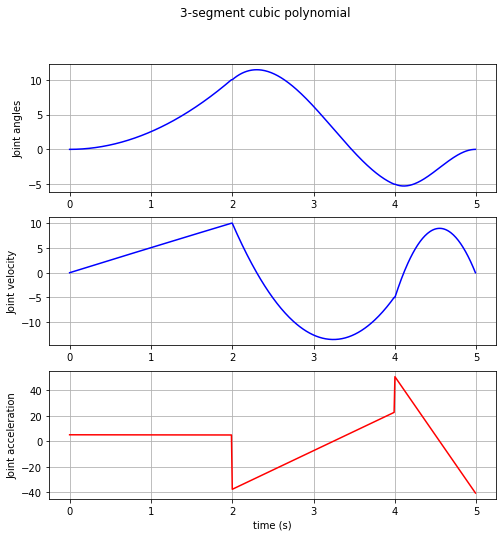

In [4]:
# generate trajectory for each segment.
t1 = np.arange(0,2,0.01)
t2 = np.arange(0,1,0.01)
q11,qd11,qdd11 = cpoly(0,10,t1,0,10)
q12,qd12,qdd12 = cpoly(10,-5,t1,10,-5)
q13,qd13,qdd13 = cpoly(-5,0,t2,-5,0)

# join the segments
q1 = np.hstack((q11,q12,q13))
qd1 = np.hstack((qd11,qd12,qd13))
qdd1 = np.hstack((qdd11,qdd12,qdd13))
t = np.arange(0,5,0.01)

# Plot the trajectory
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(8,8))
fig.suptitle('3-segment cubic polynomial')
ax1.plot(t,q1,'b-')
ax1.grid(True)
ax1.set_ylabel('Joint angles')

ax2.plot(t,qd1,'b-')
ax2.grid(True)
ax2.set_ylabel('Joint velocity')

ax3.plot(t,qdd1,'r-')
ax3.set_xlabel('time (s)')
ax3.set_ylabel('Joint acceleration')
ax3.grid(True)



Design a linear feedback control using classical loopshaping method (details are omitted).  

$$
C(s) = 40000\frac{(s+0.1)}{(s+30)}
$$
<div align="right">(10)</div>

Create the plant and controller.

In [5]:
# robot joint plant
J = 8
B = 0.01
s = ctl.tf('s')
P = 1/(J*s**2 + B*s)

# controller
C = 4000*(s+0.1)/(s+30)

Simulate and plot the traking performance without using feedforward control

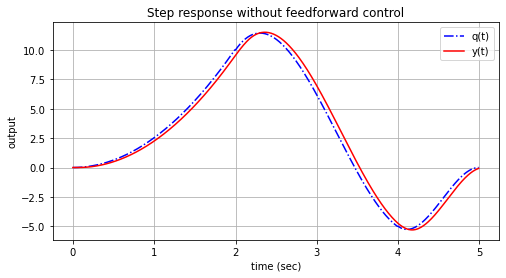

In [7]:
L = C*P
sys1 = L/(1+L)
t = np.arange(0,5,0.01)
tout, y1 = ctl.forced_response(sys1,t,q1)

plt.figure(figsize=(8,4))
plt.plot(tout,q1,'b-.',tout,y1,'r-') 
plt.grid('True')
plt.xlabel('time (sec)')
plt.ylabel('output')
plt.legend(["q(t)","y(t)"])
plt.title('Step response without feedforward control')
plt.show()

From the result, we see that tracking error is noticable. 

Now, let's see if this can be improved with feedforward. Let $J_m$ and $B_m$ be estimated parameters of the real plant,
with random modeling error within $\pm 10 \%$ 

In [11]:
Jm = (1+0.1*np.random.rand())*J
Bm = (1+0.1*np.random.rand())*B
print("Inertia J = 8 is estimated as Jm = {}".format(Jm))
print("Friction B is estimated as Bm = {}".format(Bm))

Inertia J = 8 is estimated as Jm = 8.2229783406768
Friction B is estimated as Bm = 0.010156142507352335


Simulation of the feedback + feedforward system is performed by observing from Figure 3 that the transfer function 
from $u_{ff}(s)$, the output of feedforward block, to output $y(s)$ is $P(s)S(s)$. Hence, we compute this transfer function
 and use append() function to achieve both the tracking response from original feedback system, and the compensation part 
from feedforward

In [12]:
u_ff = Jm*qdd1 + Bm*qd1 # output from the feedforward bloack
S = 1/(1+L)
sys2 = P*S  # closed-loop transfer function seen by the feedforward block
sys = ctl.append(sys1, sys2) 
u = np.vstack((q1,u_ff))
tout, yout = ctl.forced_response(sys,t,u )

It is interesting to plot outputs from this augmented system

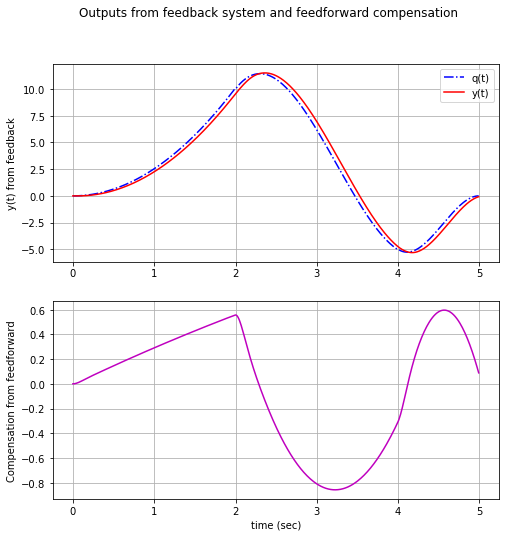

In [19]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8,8))
fig.suptitle('Outputs from feedback system and feedforward compensation')
ax1.plot(tout,q1,'b-.',tout,yout[0],'r-')
ax1.grid(True)
ax1.set_ylabel('y(t) from feedback')
ax1.legend(["q(t)","y(t)"])

ax2.plot(tout,yout[1],'m-')
ax2.grid(True)
ax2.set_ylabel('Compensation from feedforward')
ax2.set_xlabel('time (sec)')

plt.show()    

The output from feedforward does not make much sense until you sum the two outputs together, then plot the overall tracking 
response.

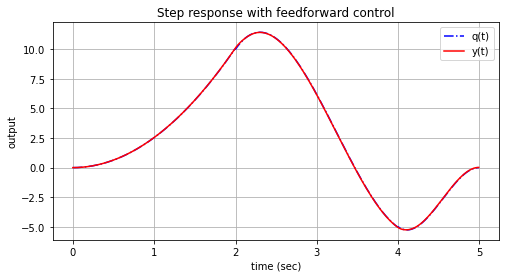

In [18]:
y2 = np.sum(yout, axis = 0) # sum along horizontal axis

plt.figure(figsize=(8,4))
plt.plot(tout,q1,'b-.',tout,y2,'r-') 
plt.grid('True')
plt.xlabel('time (sec)')
plt.ylabel('output')
plt.legend(["q(t)","y(t)"])
plt.title('Step response with feedforward control')
plt.show()

This final plot shows htat the tracking performance is improved significantly with this feedforward scheme. 

<b>Exercise : </b>Try increasing the modeling error of $J$ and $B$, say, to $\pm 50 \%$. 

<h3>Reference</h3>
<ol>
<li>V.Toochinda, Robot Analysis and Control with Scilab and RTSX, Mushin Dynamics, 2014.</li>
<li>M.W.Spong, S. Hutchinson and M. Vidyasagar,  Robot Modeling and Control. John Wiley & Sons. 2006. </li>
</ol>

<div align="right">Last update : May 18, 2021</div>

<p align="center">
<img src="https://drive.google.com/thumbnail?id=13bzT7Rmy3bzvE7TiS0yfQo94kpxMuipF" alt="dewninja"/>
</p>
<div align="center">dew.ninja<br>Copyright 2021</div>